In [1]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
df = pd.read_csv('HR.csv')
print(df)
import warnings
warnings.filterwarnings("ignore")

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [2]:
left = df[df['left']==1]
left.shape

(3571, 10)

In [3]:
retain = df[df['left']==0]
retain.shape

(11428, 10)

In [4]:
newdf = df.drop(columns=['Department','salary'])
newdf.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

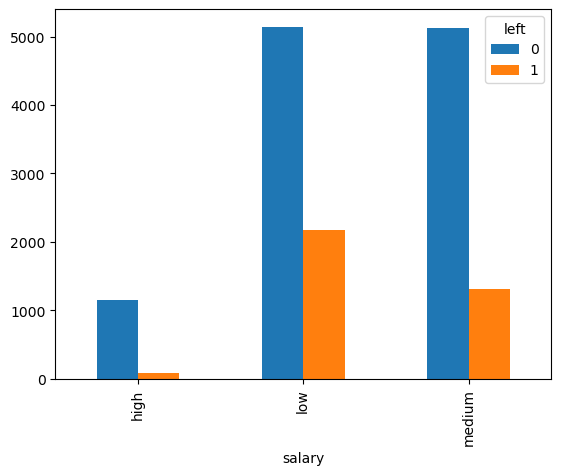

In [5]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

In [6]:
df['Department'] = pd.Categorical(df['Department'])
df['Department'] = df['Department'].cat.codes

poin_corr = df['Department'].corr(df['left'])

<Axes: xlabel='Department'>

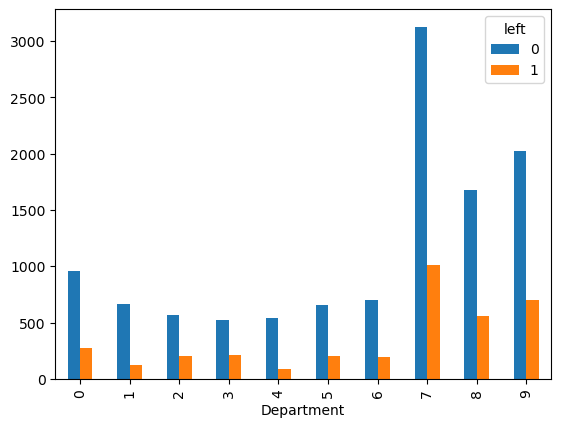

In [7]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')

In [8]:
df = pd.get_dummies(df,dtype=int)
print(df)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [9]:
print(newdf.to_string())

       satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years
0                    0.38             0.53               2                   157                   3              0     1                      0
1                    0.80             0.86               5                   262                   6              0     1                      0
2                    0.11             0.88               7                   272                   4              0     1                      0
3                    0.72             0.87               5                   223                   5              0     1                      0
4                    0.37             0.52               2                   159                   3              0     1                      0
5                    0.41             0.50               2                   153                   3              0     1         

In [10]:
x =df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary_high','salary_low','salary_medium']]
y = df[['left']]

In [11]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [13]:
num = int(input("Enter how many data needed?"))
for i in range(num):
    input_data = []
    x1=int(input("enter the satisfaction level: " ))
    x2=int(input("enter the average_montly_hours: "))
    x3=int(input("enter the promotion_last_5years :" ))
    x4=(input("enter the salary(low ,high,medium):"))
    if x4=='low':
        x4,x5,x6=1,0,0
        input_data.append([x1, x2, x3,x4,x5,x6])
        ans = model.predict(input_data)
        print(ans)
    elif x4=='high':
        x4,x5,x6=0,1,0
        input_data.append([x1, x2, x3,x4,x5,x6])
        ans = model.predict(input_data)
        print(ans)
    else:
        x4,x5,x6=0,0,1
        input_data.append([x1, x2, x3,x4,x5,x6])
        ans = model.predict(input_data)
        print(ans)
    

Enter how many data needed?1
enter the satisfaction level: 5
enter the average_montly_hours: 478
enter the promotion_last_5years :5
enter the salary(low ,high,medium):high
[0]


In [ ]:
score = model.score(x,y)
print(score)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15)

In [ ]:
model.fit(x_train,y_train)
ans2 = model.predict(x_test)
print(ans2)

In [ ]:
score2 = model.score(x_test,y_test)
print(score2)